In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import multilabel_confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from naive_bayes_classifier import MyNaiveBayesClassifier

## Загрузка и изучение данных

In [38]:
data = load_iris()
X, y = data.data, data.target
print(X.shape, y.shape)

(150, 4) (150,)


In [48]:
df = pd.DataFrame(
    data = np.concatenate((data.data, data.target[:, None]), axis=1), 
    columns = [*data.feature_names, 'target'])
df['target'] = df['target'].astype('int32')
df.sample(5)
df.to_csv('iris.csv')

Рассмотрим распределения числовых признаков

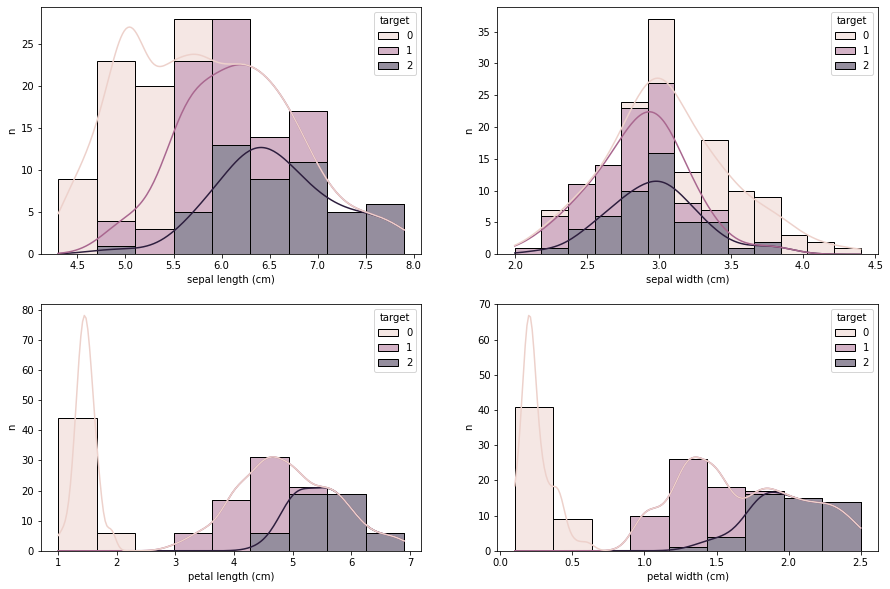

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, axis in enumerate(axes.flat):
    sns.histplot(data=df, x=df.iloc[:, i], ax=axis, kde=True, hue='target', multiple='stack')
    axis.set_xlabel(data.feature_names[i])
    axis.set_ylabel('n')

## Обучение и предсказывание

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [42]:
nb_clf = MyNaiveBayesClassifier()
nb_clf.fit(X_train, y_train)

In [43]:
cls_preds = nb_clf.predict(X_test)
unique, counts = np.unique(cls_preds, return_counts=True)
np.asarray((unique, counts)).T

array([[0, 5],
       [1, 4],
       [2, 6]])

Точность предсказаний и ошибки на тестовых данных:

In [44]:
print(f'Precision: {precision_score(y_test, cls_preds, average="macro")}')
print(f'Confusion matrix:\n{multilabel_confusion_matrix(y_test, cls_preds)}')

Precision: 0.9444444444444445
Confusion matrix:
[[[10  0]
  [ 0  5]]

 [[10  0]
  [ 1  4]]

 [[ 9  1]
  [ 0  5]]]


На всех данных:

In [45]:
y_preds = nb_clf.predict(X)
print(f'Precision: {precision_score(y, y_preds, average="macro")}')
print(f'Confusion matrix:\n{multilabel_confusion_matrix(y, y_preds)}')

Precision: 0.96
Confusion matrix:
[[[100   0]
  [  0  50]]

 [[ 97   3]
  [  3  47]]

 [[ 97   3]
  [  3  47]]]


[Text(0.5, 1.0, 'Naive Bayes classification')]

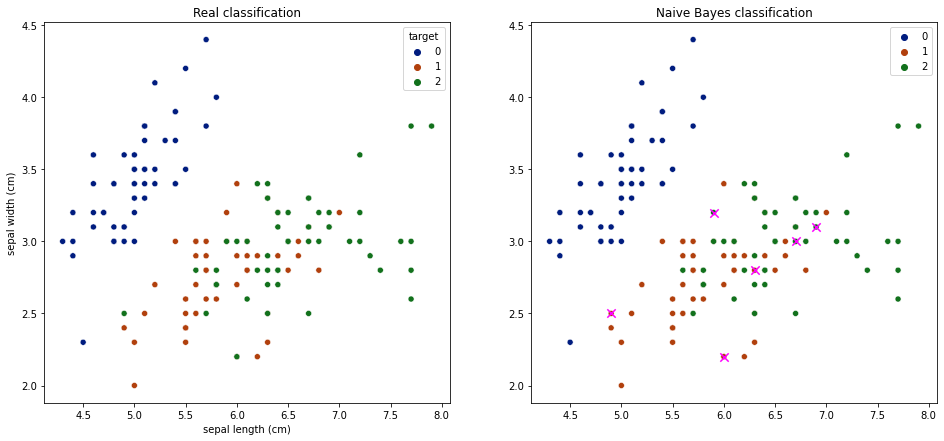

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', ax=ax1, palette='dark')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_preds, ax=ax2, palette='dark')

error_mask = y != y_preds
ax2.scatter(x=X[error_mask, 0], y=X[error_mask, 1], marker='x', c='magenta', s=70.0)

ax1.set(title='Real classification')
ax2.set(title='Naive Bayes classification')

In [47]:
nb_clf.label_prior

{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333}

Вывод: модель имеет небольшую ошибку в определении 2 и 3 классов. Ошибка возникла вследствие наивности предположения о распределении признаков, т.к. некоторые из условных распределений только напоминают нормальные, а признаки в сущности имеют зависимость.